In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-04-28 05:50:00--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-28 05:50:01 (115 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir, create_tensorboard_callback, compare_historys

In [ ]:
# Download data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2025-04-28 05:50:01--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2025-04-28 05:50:01 (103 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [ ]:
#unzip data
unzip_data("nlp_getting_started.zip")

In [ ]:
#Turn .csv files into pandas DataFrame's

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)   #frac returns percentage #sample shuffle dataset and frac tells how MANY PERCENTAGES
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many examples of each class?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
import random
random_index = random.randint(0, len(train_df) -5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target:{target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target:1 (real disaster)
Text:
Breakfast links: Work from home: Derailed: An empty train derailed at Smithsonian this morning suspending ser... http://t.co/iD4QGqDnJQ

---

Target:0 (not real disaster)
Text:
#wired #business Reddit Will Now Quarantine Offensive Content http://t.co/ZhzVprZbgq

---

Target:1 (real disaster)
Text:
It's a miracle that mankind survived 70 years since one of the worst days in its history. All bets are off if it will survive the next 70.

---

Target:0 (not real disaster)
Text:
What a wonderful day!

---

Target:1 (real disaster)
Text:
@pattonoswalt @FoxNews Wait I thought Fecal Hurricane was on SciFi? Maybe that was turdnado. I've been forgeting up a shit storm lately.

---



In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#View the first 10 training sentence and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


text_vectorizer = TextVectorization(max_tokens=None,    # how many words in the vocabulary (all of the different words in your text)      en chox istifade olunan sozleri basha qoyur ve onlari tokenize edir     necheye beraber olsa o qeder ilk bashdan muxtelif sozleri tokenize edir, none qoymushuq ki butun sozleri chevirsin
                                    standardize='lower_and_strip_punctuation',  # how to process text             # hamisini balaca herflerle yazir meselen (standartlashdirmaq uchun)
                                    split='whitespace',   # how to split tokens                           # her bir sozu whitespace ile bolsun
                                    ngrams=None,          # create groups of n-words?
                                    output_mode='int',    # how to map tokens to numbers              reqem formatinda cixarsin
                                    output_sequence_length=None)    # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)       # Not valid if using max_tokens=None    # mes cumlede 20 soz olmalidi ve 10 soz varsa onda qalan 10 deneni '0' ile evez edir. output_sequence_length aktiv olanda ishe dushur

In [ ]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))  # ortalama soz uzunlugu tapirirq cunki cumleler eyni uzunluqda olmalidir

15

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000  #max number of words to have in  our vocabulary
max_length = 15 #length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens= max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentences = 'My crocodile ate my friend'
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13,    1,    1,   13, 1020,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
@bellalinn alrighty Hit me up and we'll blaze!!

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   1, 244,  31,  27,   7, 251, 749,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()     #hansi sozleri oyrenib baxmaq uchun
top_5_words = words_in_vocab[:5]      #most common (notice the [UNK] token stands for 'unknown' words)
bottom_5_words = words_in_vocab[-5:]      #least common tokens

print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name = 'embedding_1')
embedding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      \n\nEmbaded version:')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@dinallyhot Love what you picked! We're playing WORTH IT by FIFTH HARM/KID INK because of you! Listen &amp; Vote: http://t.co/0wrATkA2jL      

Embaded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04176497, -0.00247186, -0.02271701, ..., -0.03761347,
          0.03562639,  0.00744151],
        [ 0.02197018,  0.02112674,  0.03452364, ...,  0.02628524,
          0.01554621,  0.02140805],
        [ 0.04599572, -0.01828934, -0.03405677, ..., -0.02878209,
         -0.01190457,  0.02251789],
        ...,
        [ 0.02914945, -0.0121481 ,  0.02781171, ...,  0.0170251 ,
         -0.00428943, -0.04631218],
        [-0.03757496, -0.00372615,  0.00949294, ...,  0.02655181,
          0.00428092, -0.01666913],
        [ 0.00674285,  0.03265348,  0.03379252, ..., -0.02386903,
         -0.04389215,  0.029747  ]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04176497, -0.00247186, -0.02271701, -0.04917839, -0.02158407,
        0.0487853 , -0.025514  , -0.03912992,  0.04006431, -0.02039769,
       -0.02509899, -0.01962939, -0.00856978, -0.02713547,  0.03218324,
       -0.00154801, -0.01860939,  0.03621758,  0.03263791, -0.04152075,
        0.0160966 , -0.00193937,  0.00527382,  0.03184917,  0.01610195,
       -0.00712071,  0.00623568, -0.03233129, -0.02656054,  0.04639344,
        0.02048315, -0.01889442,  0.00638125,  0.01133325, -0.01409035,
       -0.03635031,  0.00291855,  0.03175146,  0.04633534,  0.02802179,
        0.00783455,  0.00964266, -0.04045635,  0.03053835, -0.02414193,
        0.01532995, -0.03823686,  0.02126021, -0.01504645,  0.03384197,
       -0.04902565, -0.04103409,  0.04674249, -0.0355413 , -0.03167917,
        0.00548409,  0.01168103,  0.03335805, -0.0271242 ,  0.00529682,
        0.01886307,  0.04574131, -0.04338245, -0.00180421, -0.03544612,
        0.039784

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0_history = model_0.fit(train_sentences, train_labels)

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model_0.predict(["earthquake didn't happen"])

array([1])

#Creating an evaluation function for our model experiments


we could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function wihich takes an array of predictions and ground truth labels and computes the following

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#Model1:A simple dense model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055003
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6399 - loss: 0.6499 - val_accuracy: 0.7572 - val_loss: 0.5346
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8084 - loss: 0.4669 - val_accuracy: 0.7887 - val_loss: 0.4742
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8533 - loss: 0.3626 - val_accuracy: 0.7940 - val_loss: 0.4619
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8870 - loss: 0.2962 - val_accuracy: 0.7848 - val_loss: 0.4680
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9065 - loss: 0.2474 - val_accuracy: 0.7782 - val_loss: 0.4836


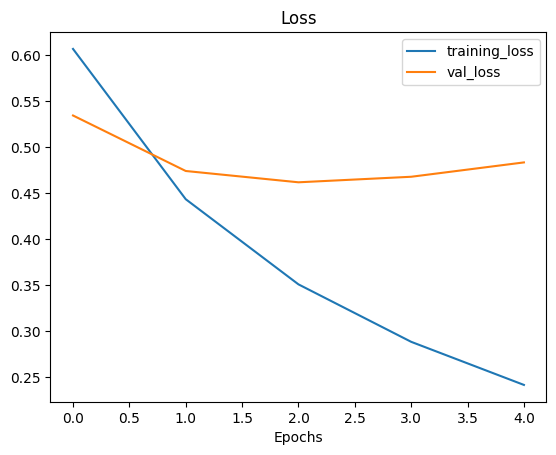

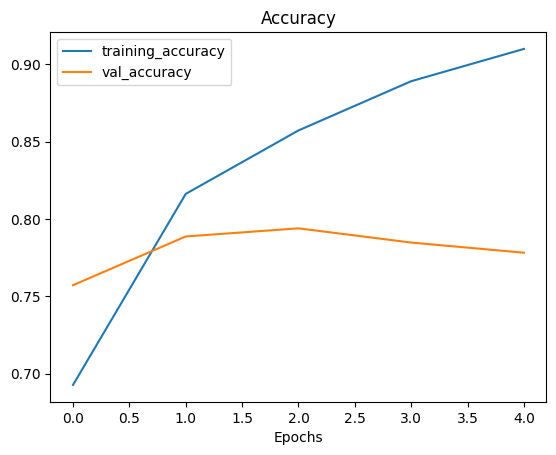

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7677 - loss: 0.5163


[0.4835827350616455, 0.778215229511261]

In [ ]:
embedding.weights

[<Variable path=embedding_1/embeddings, shape=(10000, 128), dtype=float32, value=[[ 0.01004807 -0.05772097  0.00921597 ... -0.03063026 -0.01429618
   -0.02305798]
  [-0.05411317 -0.01473617 -0.01136232 ... -0.05008388  0.04823829
   -0.00116926]
  [ 0.00878592 -0.0112284  -0.0167763  ... -0.00332832 -0.02114801
   -0.03553564]
  ...
  [-0.02504374  0.04496982  0.03022642 ... -0.04612479  0.01369667
   -0.03099519]
  [-0.02619191 -0.0710333   0.06486384 ... -0.05929201  0.04271573
   -0.01315356]
  [-0.01472711 -0.02096803  0.03112433 ... -0.01292093  0.01453219
   -0.11348309]]>]

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


array([[0.3290319 ],
       [0.73474497],
       [0.99771994],
       [0.18938747],
       [0.09883742],
       [0.94267464],
       [0.8916542 ],
       [0.9943516 ],
       [0.96073776],
       [0.38618696]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
tf.squeeze(model_1_pred_probs).shape

TensorShape([762])

In [ ]:
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)

How many we compare first deep model to our baseline model?

In [ ]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


Vizualizing learned embeddings

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model 2

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(50, input_shape=(1,), activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_dense')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_2.summary()

Model: "model_2_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315,851 (5.02 MB)

 Trainable params: 1,315,851 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,\
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055023
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.8526 - loss: 0.3667 - val_accuracy: 0.7795 - val_loss: 0.6032
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9276 - loss: 0.1793 - val_accuracy: 0.7848 - val_loss: 0.6972
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9429 - loss: 0.1444 - val_accuracy: 0.7717 - val_loss: 0.8511
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9563 - loss: 0.1150 - val_accuracy: 0.7677 - val_loss: 1.1514
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9643 - loss: 0.0935 - val_accuracy: 0.7651 - val_loss: 1.1882


#Model 3

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(50, input_shape=(1,), activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_dense')

In [ ]:
model_3.summary()

Model: "model_3_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        27,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,307,051 (4.99 MB)

 Trainable params: 1,307,051 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055120
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.8291 - loss: 0.3515 - val_accuracy: 0.7795 - val_loss: 0.7525
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9621 - loss: 0.0985 - val_accuracy: 0.7664 - val_loss: 0.8925
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9734 - loss: 0.0770 - val_accuracy: 0.7690 - val_loss: 1.0381
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9740 - loss: 0.0730 - val_accuracy: 0.7756 - val_loss: 1.1834
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9763 - loss: 0.0649 - val_accuracy: 0.7612 - val_loss: 1.1660


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


((762, 1),
 array([[2.9951284e-02],
        [9.4738114e-01],
        [9.9999988e-01],
        [1.5912524e-01],
        [5.8069283e-05],
        [1.0000000e+00],
        [9.9936241e-01],
        [1.0000000e+00],
        [1.0000000e+00],
        [4.3485886e-01]], dtype=float32))

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.11548556430446,
 'precision': 0.761395918264994,
 'recall': 0.7611548556430446,
 'f1': 0.7597317731418465}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.12, Difference: -3.15
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


#Model4: LSTM

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name = 'embedding_2')

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

(None, 15, 128)
(None, 64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055246
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6715 - loss: 0.5817 - val_accuracy: 0.7730 - val_loss: 0.4612
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8657 - loss: 0.3304 - val_accuracy: 0.7612 - val_loss: 0.5218
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9145 - loss: 0.2292 - val_accuracy: 0.7559 - val_loss: 0.6357
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9491 - loss: 0.1499 - val_accuracy: 0.7493 - val_loss: 0.7760
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9630 - loss: 0.1170 - val_accuracy: 0.7612 - val_loss: 0.7106


#Model_5

In [ ]:
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name = 'embedding_2')

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.LSTM(64, return_sequences=True, kernel_regularizer='l2')(x)
x = layers.LSTM(64, return_sequences=True, kernel_regularizer='l2')(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_3_LSTM')

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "model_3_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 15, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 15, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,969 (5.35 MB)

 Trainable params: 1,401,969 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055305
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6163 - loss: 3.1439 - val_accuracy: 0.7638 - val_loss: 0.8467
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8307 - loss: 0.6761 - val_accuracy: 0.7415 - val_loss: 0.7180
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8951 - loss: 0.4061 - val_accuracy: 0.7231 - val_loss: 0.8566
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9321 - loss: 0.3068 - val_accuracy: 0.7415 - val_loss: 0.7843
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9498 - loss: 0.2731 - val_accuracy: 0.7323 - val_loss: 0.7995


#Model_6

In [ ]:
model_6_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 1,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_6_embedding(x)
x = layers.LSTM(1, kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_6 = tf.keras.Model(inputs, outputs, name='model_6_LSTM')

In [ ]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_6.summary()

Model: "model_6_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 1)          │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,014 (39.12 KB)

 Trainable params: 10,014 (39.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055333
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5674 - loss: 0.7107 - val_accuracy: 0.5433 - val_loss: 0.7032
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5694 - loss: 0.6959 - val_accuracy: 0.5433 - val_loss: 0.6982
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5694 - loss: 0.6897 - val_accuracy: 0.5433 - val_loss: 0.6943
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5694 - loss: 0.6842 - val_accuracy: 0.5433 - val_loss: 0.6865
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5791 - loss: 0.6657 - val_accuracy: 0.7244 - val_loss: 0.6252


#GRU - Gated Recurrent Unit

GRU tries to learn contxt of words instead of sequence

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_7_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_7')
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_7_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs, outputs, name='model_7_GRU')

In [ ]:
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_7.summary()

Model: "model_7_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055347
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6464 - loss: 0.6044 - val_accuracy: 0.7730 - val_loss: 0.4581
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8591 - loss: 0.3399 - val_accuracy: 0.7703 - val_loss: 0.5114
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9085 - loss: 0.2390 - val_accuracy: 0.7585 - val_loss: 0.5517
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9384 - loss: 0.1729 - val_accuracy: 0.7572 - val_loss: 0.5888
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9536 - loss: 0.1383 - val_accuracy: 0.7651 - val_loss: 0.6481


In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-04-28 05:54:04--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-28 05:54:04 (14.4 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir, create_tensorboard_callback, compare_historys

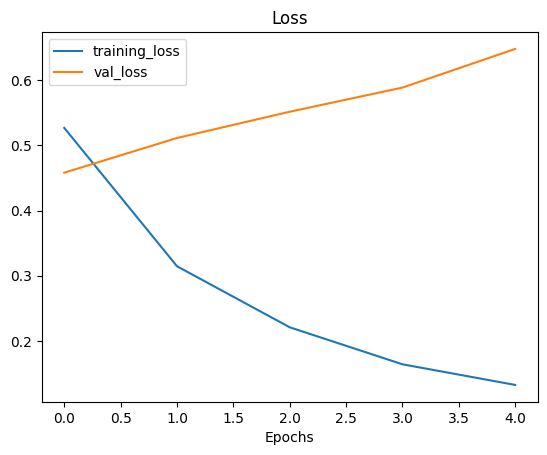

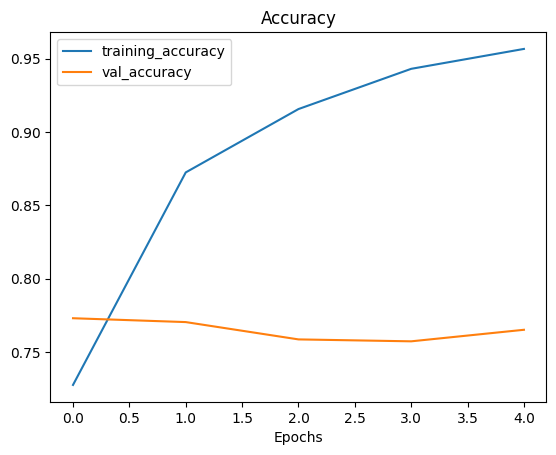

In [ ]:
plot_loss_curves(model_7_history)

#Model 8:Bidirectional LSTM model

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_8_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_8')
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_8_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_8_Bidirectional')

In [ ]:
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_8.summary()

Model: "model_8_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_8 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055405
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6711 - loss: 0.5843 - val_accuracy: 0.7795 - val_loss: 0.4631
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8659 - loss: 0.3303 - val_accuracy: 0.7664 - val_loss: 0.5144
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9155 - loss: 0.2215 - val_accuracy: 0.7572 - val_loss: 0.6116
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9487 - loss: 0.1447 - val_accuracy: 0.7625 - val_loss: 0.6721
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9628 - loss: 0.1176 - val_accuracy: 0.7507 - val_loss: 0.7307


In [ ]:
model_8_preds_props = model_8.predict(val_sentences)
model_8_preds_props[:20]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[0.1962353 ],
       [0.9915912 ],
       [0.99967563],
       [0.02540267],
       [0.00581328],
       [0.9885944 ],
       [0.56008345],
       [0.99979454],
       [0.99963534],
       [0.6071666 ],
       [0.03343972],
       [0.16320647],
       [0.00849609],
       [0.7935444 ],
       [0.06126044],
       [0.12318924],
       [0.00533964],
       [0.02844965],
       [0.10056461],
       [0.97054315]], dtype=float32)

In [ ]:
model_8_preds = tf.squeeze(tf.round(model_8_preds_props))
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_8_results = calculate_results(y_true = val_labels,
                                    y_pred=model_8_preds)
model_8_results

{'accuracy': 75.06561679790026,
 'precision': 0.7502044394332691,
 'recall': 0.7506561679790026,
 'f1': 0.7499080251314459}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_8_results)

Baseline accuracy: 79.27, New accuracy: 75.07, Difference: -4.20
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


# Convolutional Neural Networks for Text

Model 9:Conv1D

In [ ]:
embedding_test = embedding(text_vectorizer(['this is a test sentence']))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation='relu')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.04748011,  0.04140358, -0.03094092, ..., -0.0636193 ,
           0.00036745, -0.03905637],
         [-0.01306171, -0.01474153,  0.03995197, ..., -0.02405189,
          -0.01505306, -0.02341001],
         [-0.02677299,  0.0767312 ,  0.03479414, ...,  0.0673333 ,
          -0.05102192, -0.02385449],
         ...,
         [-0.07598552, -0.07179952, -0.0078103 , ..., -0.02146254,
           0.00100177, -0.05942395],
         [-0.07598552, -0.07179952, -0.0078103 , ..., -0.02146254,
           0.00100177, -0.05942395],
         [-0.07598552, -0.07179952, -0.0078103 , ..., -0.02146254,
           0.00100177, -0.05942395]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.0500227 , 0.        , 0.        , 0.10415503, 0.00696953,
          0.0989599 , 0.        , 0.        , 0.        , 0.        ,
          0.03302929, 0.        , 0.01208434, 0.05217649, 0.01138573,
          0.08162998, 0.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_9_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length=max_length,
                                     name='embeding_9')

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_9_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_9 = tf.keras.Model(inputs, outputs, name='model_9')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_9.summary()

Model: "model_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_3            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embeding_9 (Embedding)          │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 11, 32)         │        20,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300,545 (4.96 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-055429
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6497 - loss: 0.6319 - val_accuracy: 0.7822 - val_loss: 0.4722
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8447 - loss: 0.3763 - val_accuracy: 0.7900 - val_loss: 0.4778
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9116 - loss: 0.2378 - val_accuracy: 0.7848 - val_loss: 0.5371
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9466 - loss: 0.1540 - val_accuracy: 0.7808 - val_loss: 0.6085
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9650 - loss: 0.1077 - val_accuracy: 0.7795 - val_loss: 0.6661


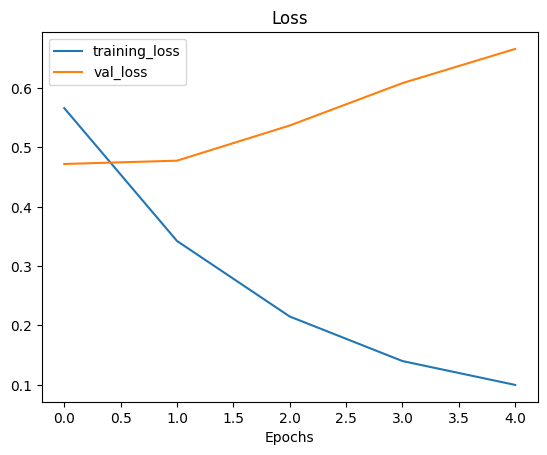

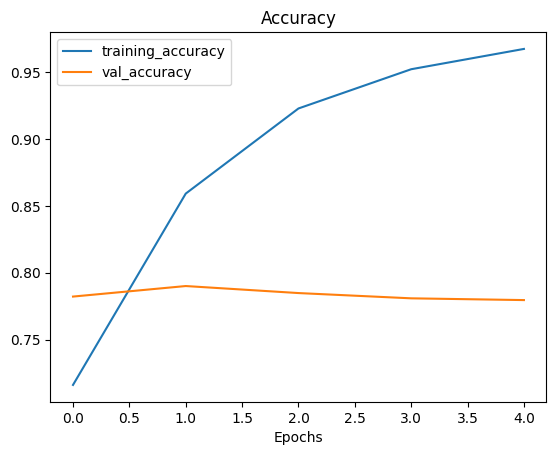

In [ ]:
plot_loss_curves(model_9_history)

In [ ]:
model_9_pred_probs = model_9.predict(val_sentences)
model_9_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.7540269 ],
       [0.9402588 ],
       [0.99967766],
       [0.06629828],
       [0.00152119],
       [0.99735487],
       [0.96450716],
       [0.9990891 ],
       [0.9985454 ],
       [0.2892375 ]], dtype=float32)

In [ ]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_9_results = calculate_results(y_true = val_labels,
                                    y_pred=model_9_preds)
model_9_results

{'accuracy': 77.95275590551181,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181,
 'f1': 0.7774022539420015}

#Model 10: Tensorflow Hub Pretrained Pretrained Sentence Encoder

In [ ]:
sample_sentence = 'My crocodile ate my friend'

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')  #Load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                       'When you call the universal sentence encoder on a sentence, it turns it into numbers.'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.06707384  0.03364494 -0.02275401 -0.02425485 -0.01192328  0.01628205
 -0.03235815  0.01783345  0.06661483  0.04477837  0.06999726 -0.02266894
 -0.00878144  0.06721929 -0.08351798 -0.07105117 -0.01542228 -0.04401793
 -0.03126107 -0.05497772  0.02604343 -0.01635449 -0.00635866  0.06587313
  0.06001672 -0.01317355 -0.03445259 -0.05356695  0.03584114 -0.00513949
  0.04245306 -0.02069402 -0.03883396 -0.04442709 -0.0005941   0.01081553
 -0.0496508   0.01584988  0.02469967 -0.03801594  0.04846692 -0.03241457
  0.01838166  0.01607024 -0.08049509  0.05904468 -0.04780786  0.06529238
  0.04183917 -0.02303949], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
sentence_encoder_layer  = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                         input_shape = [],
                                         dtype = tf.string,
                                         trainable = False,
                                         name = 'USA')

In [ ]:
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: sentence_encoder_layer(x))

In [ ]:
model_10 = tf.keras.Sequential([
    hub_layer_wrapper,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

model_10 = tf.keras.Sequential([
    hub_layer_wrapper,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 jit_compile=False, #added comma here
                 metrics=['accuracy'])
model_10.summary()

Model: "model_10_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_10_history = model_10.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-061206
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7673 - loss: 0.5765 - val_accuracy: 0.8018 - val_loss: 0.4489
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8057 - loss: 0.4212 - val_accuracy: 0.8058 - val_loss: 0.4389
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8128 - loss: 0.4067 - val_accuracy: 0.8123 - val_loss: 0.4334
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8172 - loss: 0.3983 - val_accuracy: 0.8150 - val_loss: 0.4300
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8191 - loss: 0.3920 - val_accuracy: 0.8189 - val_loss: 0.4278


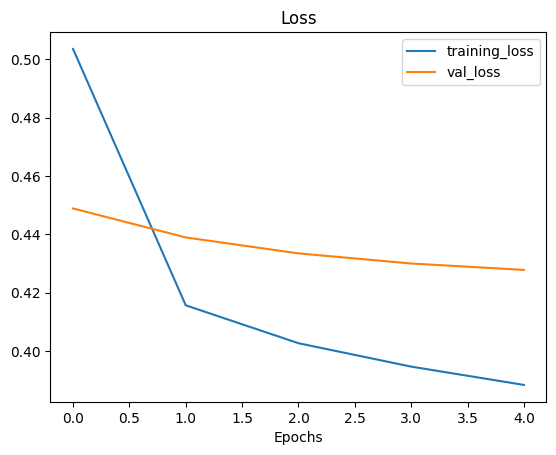

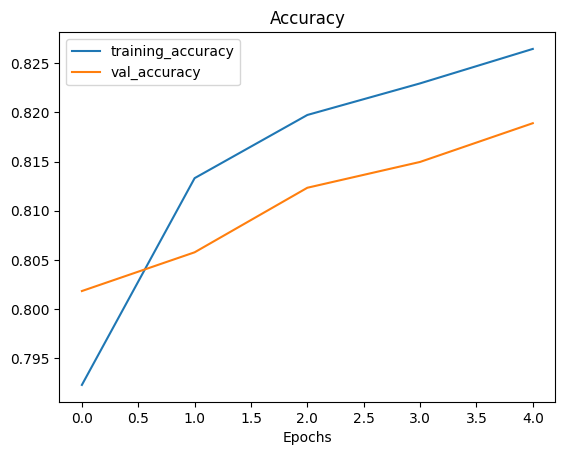

In [ ]:
plot_loss_curves(model_10_history)


In [ ]:
model_10_pred_props = model_10.predict(val_sentences)
model_10_pred_props[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


array([[0.17457128],
       [0.82552487],
       [0.9895375 ],
       [0.19702965],
       [0.7595091 ],
       [0.7726881 ],
       [0.98403025],
       [0.9803971 ],
       [0.9587683 ],
       [0.10826322]], dtype=float32)

In [ ]:
model_10_preds = tf.squeeze(tf.round(model_10_pred_props))
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:

model_10_results = calculate_results(val_labels, model_10_preds)
model_10_results


{'accuracy': 81.88976377952756,
 'precision': 0.8191812781393194,
 'recall': 0.8188976377952756,
 'f1': 0.818214404537461}

In [ ]:

# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_10_results)

Baseline accuracy: 79.27, New accuracy: 81.89, Difference: 2.62
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.03
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


#Model 11: Tensorflow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
print(f'Total training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:

pd.Series(train_labels_10_percent).value_counts()

,count
0,415
1,271


In [ ]:
sentence_encoder_layer  = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                         input_shape = [],
                                         dtype = tf.string,
                                         trainable = False,
                                         name = 'USA')

In [ ]:
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: sentence_encoder_layer(x))

In [ ]:
model_11 = tf.keras.Sequential([
    hub_layer_wrapper,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

model_11.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 jit_compile=False, #added comma here
                 metrics=['accuracy'])
model_11.summary()

Model: "model_10_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_11_history = model_11.fit(train_sentences_10_percent,
                                train_labels_10_percent,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-062851
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5936 - loss: 0.6806 - val_accuracy: 0.6798 - val_loss: 0.6470
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8084 - loss: 0.6041 - val_accuracy: 0.7362 - val_loss: 0.5892
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8145 - loss: 0.5279 - val_accuracy: 0.7625 - val_loss: 0.5348
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8334 - loss: 0.4646 - val_accuracy: 0.7717 - val_loss: 0.5027
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8258 - loss: 0.4219 - val_accuracy: 0.7756 - val_loss: 0.4883


In [ ]:
model_11_pred_props = model_11.predict(val_sentences)
model_11_pred_props[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


array([[0.2933488 ],
       [0.79930604],
       [0.8931042 ],
       [0.3094312 ],
       [0.54719603],
       [0.8452289 ],
       [0.82153255],
       [0.8582525 ],
       [0.82857007],
       [0.12190473]], dtype=float32)

In [ ]:

model_11_preds = tf.squeeze(tf.round(model_11_pred_props))
model_11_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:

model_11_results = calculate_results(val_labels, model_11_preds)
model_11_results

{'accuracy': 77.55905511811024,
 'precision': 0.7802047087708873,
 'recall': 0.7755905511811023,
 'f1': 0.7723569237171506}

In [ ]:

# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_11_results)

Baseline accuracy: 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


#Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  #"lstm": model_2_results,
                                  "gru": model_3_results,
                                  #"bidirectional": model_4_results,
                                  #"conv1d": model_5_results,
                                  #"tf_hub_sentence_encoder": model_6_results,
                                  #"tf_hub_10_percent_data": model_7_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,77.821522,0.781072,0.778215,0.775746
gru,76.115486,0.761396,0.761155,0.759732


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100

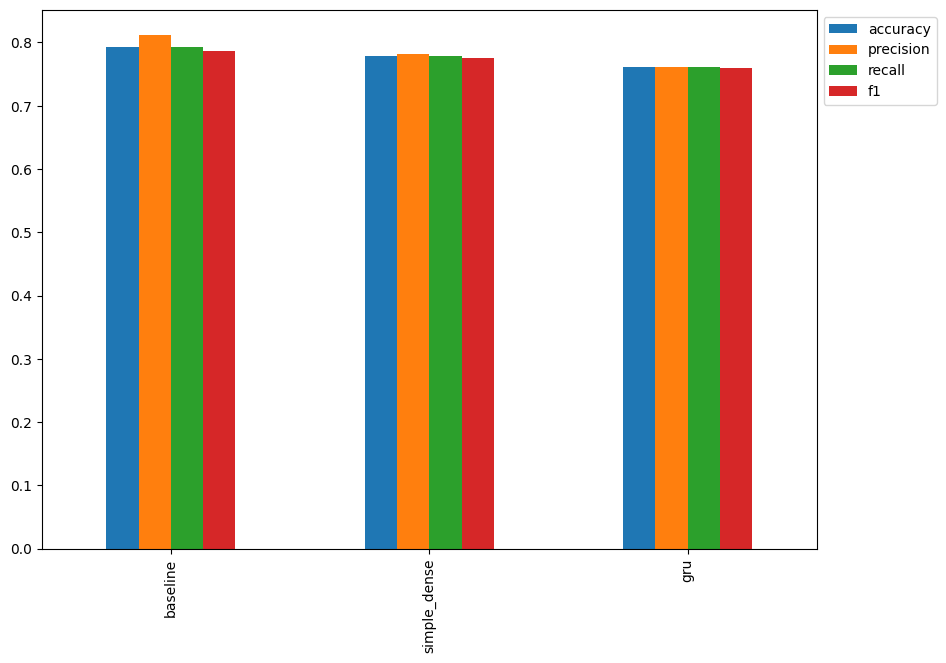

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

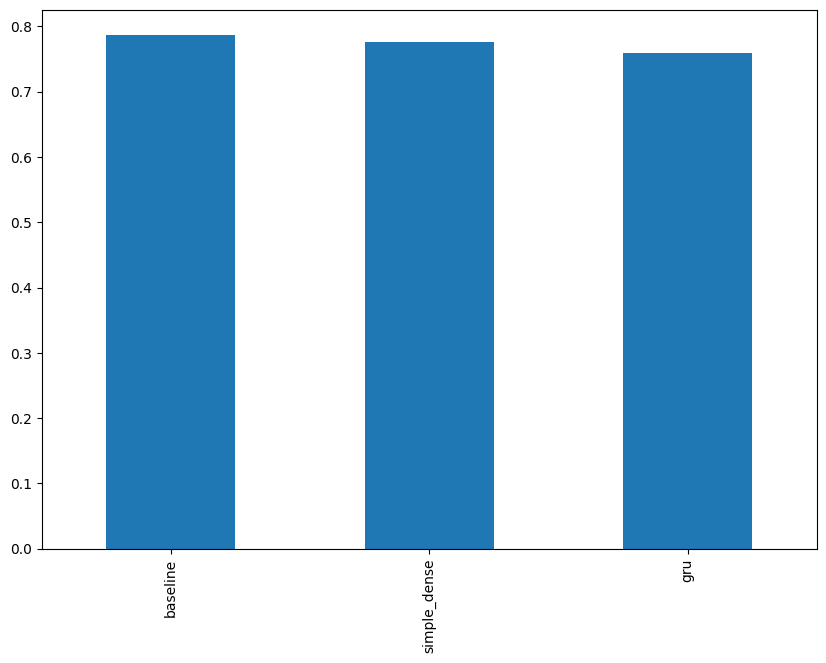

In [ ]:
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(10, 7));

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)

# Ensure model_8_pred_props is defined by running the prediction for model_8
model_8_pred_props = model_8.predict(val_sentences)

# Ensure model_10_pred_props is defined by running the prediction for model_10
model_10_pred_props = model_10.predict(val_sentences)

combined_pred_probs = baseline_pred_probs + tf.squeeze(model_8_pred_props, axis=1) + tf.squeeze(model_10_pred_props, axis=1)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:

# Save TF Hub Sentence Encoder model to HDF5 format
model_10.save('model_10.keras.h5')

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_10 = tf.keras.models.load_model('model_10.h5',
                                             custom_objects={'KerasLayer': hub.KerasLayer})

ValueError: Layer count mismatch when loading weights from file. Model expected 0 layers, found 2 saved layers.

#Finding the most wrong examples

In [ ]:

# Create dataframe with valdiation sentences and best performing model predictions
val_df = pd.DataFrame({'text':val_sentences,
                       'target':val_labels,
                       'pred':model_10_preds,
                       'pred_prob':tf.squeeze(model_10_pred_props)})
val_df.head()


,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.174571
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.825525
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.989537
3,@camilacabello97 Internally and externally scr...,1,0.0,0.197030
4,Radiation emergency #preparedness starts with ...,1,1.0,0.759509


In [ ]:

# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10]


,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.926779
759,FedEx will no longer transport bioterror patho...,0,1.0,0.907123
628,@noah_anyname That's where the concentration c...,0,1.0,0.897793
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.896538
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.854895
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.853322
474,My phone looks like it was in a car ship airpl...,0,1.0,0.839631
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.825525
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.819340
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.819029


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text: \n{text}\n')
  print('----\n')

Target: 0, Pred: 1, Prob: 0.9267785549163818
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.9071234464645386
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8977931141853333
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8965380787849426
Text: 
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8548952341079712
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8533220291137695
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred:

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 1, Pred: 0, Prob: 0.06579538434743881
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.06193620711565018
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.06177022308111191
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.050669264048337936
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05052884295582771
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04848756641149521
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.04349399730563164
Text:
Reddit Will Now Qua

#Making predictions on the test dataset